# Introduction
In the lab we investigated the behaivor of series RLC Circuits. We constructed a series RLC circuit with a 0.1&#956;F capacitor a 88 mH Inductor and a resistor. The resistance was adjusted inorder to determine the response of the circuit when it is over damped critically damped and under damped. 
# Procedure
## Part 1
In part 1 we constructed a circuit wuth an overdamped response. The response was measured with an osciliscope and included with the lab report
## Part 2
In part 2 we constructed two circuits one with a slightly over damped response and the other with an under damped response. The critical response was then estimated. 

## Part 3
In part 3 we constructed a circuit with a under damped response and measured the response with an osciliscope
## Part 4
In part 4 the theoritical response was determined and compared to the measured responses


In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 500

In [2]:
def plot_osc(f_name,title,col_1="",col_2=""):
    temp = np.loadtxt(f_name,skiprows=4,delimiter=',')
    print(temp)
    print(temp.shape)
    in_signal = np.vstack((temp[:,0],temp[:,1]))
    out_signal = np.vstack((temp[:,0],temp[:,2]))
    print(temp[:,1])
    plt.scatter(in_signal[0],in_signal[1],label=col_1)
    plt.scatter(out_signal[0],out_signal[1],label=col_2)
    plt.xlim(min(in_signal[0,:]),max(in_signal[0,:]))
    ticks_dist = -(min(in_signal[0])-max(in_signal[0]))/5.0
    plt.xticks(np.arange(min(in_signal[0]),max(in_signal[0]),ticks_dist))
    plt.xlabel("Seconds")
    plt.ylabel("Volts")
    plt.title(title)
    legend = plt.legend()
    plt.show()

No handles with labels found to put in legend.


[[-6.55000000e-05 -4.97487443e-01 -1.47236497e-02]
 [-6.52500000e-05 -4.97487443e-01 -3.98492776e-02]
 [-6.50000000e-05 -4.97487443e-01 -3.98492776e-02]
 ...
 [ 4.33250000e-04 -4.57286438e-01 -7.08190979e-01]
 [ 4.33500000e-04 -4.57286438e-01 -7.08190979e-01]
 [ 4.33750000e-04 -4.59799001e-01 -6.47889472e-01]]
(1998, 3)
[-0.49748744 -0.49748744 -0.49748744 ... -0.45728644 -0.45728644
 -0.459799  ]


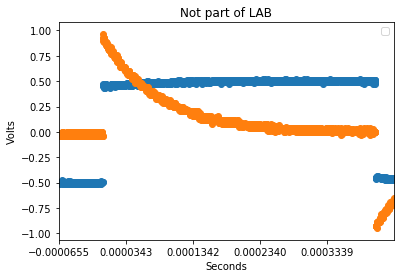

In [10]:
plot_osc("/home/nick/sshfs/Documents/lab07/scope_1.csv",
"Not part of LAB")

No handles with labels found to put in legend.


[[-4.99000000e-04  4.65286433e-01  4.39336692e-01]
 [-4.98500000e-04  4.70311558e-01  4.34311566e-01]
 [-4.98000000e-04  4.75336684e-01  4.29286441e-01]
 ...
 [ 4.98500000e-04 -5.09587929e-01  1.22010182e-02]
 [ 4.99000000e-04 -5.09587929e-01  7.17589260e-03]
 [ 4.99500000e-04 -5.09587929e-01  7.17589260e-03]]
(1998, 3)
[ 0.46528643  0.47031156  0.47533668 ... -0.50958793 -0.50958793
 -0.50958793]


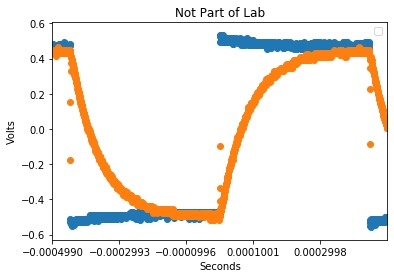

In [11]:
plot_osc("/home/nick/sshfs/Documents/lab07/scope_4.csv",
"Not Part of Lab")

[[-9.98000000e-04  1.99487432e+00  9.14623100e-02]
 [-9.97000000e-04  1.99487432e+00  9.12613100e-02]
 [-9.96000000e-04  1.99487432e+00  9.16633200e-02]
 ...
 [ 9.97000000e-04 -1.51759100e-02  9.11608100e-02]
 [ 9.98000000e-04 -1.51759100e-02  9.12613100e-02]
 [ 9.99000000e-04 -1.51759100e-02  9.13618100e-02]]
(1998, 3)
[ 1.99487432  1.99487432  1.99487432 ... -0.01517591 -0.01517591
 -0.01517591]


No handles with labels found to put in legend.


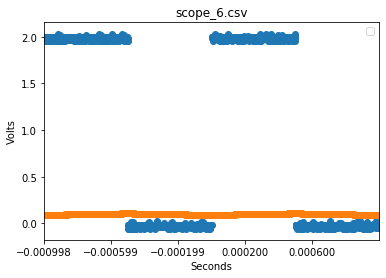

In [5]:
plot_osc("/home/nick/sshfs/Documents/lab07/scope_6.csv",
"probably 1d")

[[-9.9800000e-04  5.2763817e-01  1.9853770e-01]
 [-9.9700000e-04  3.6683416e-01  1.9853770e-01]
 [-9.9600000e-04  1.6582913e-01  1.9853770e-01]
 ...
 [ 9.9700000e-04 -7.8894473e-01  5.4775000e-04]
 [ 9.9800000e-04 -7.9899498e-01 -2.4673200e-03]
 [ 9.9900000e-04 -7.9899498e-01 -1.4623000e-03]]
(1998, 3)
[ 0.52763817  0.36683416  0.16582913 ... -0.78894473 -0.79899498
 -0.79899498]


No handles with labels found to put in legend.


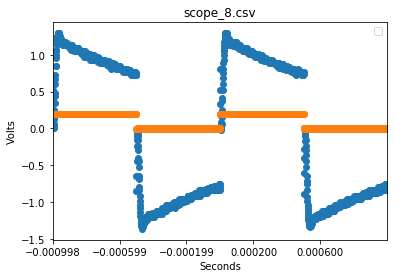

In [6]:
plot_osc("/home/nick/sshfs/Documents/lab07/scope_8.csv",
"scope_8.csv")

No handles with labels found to put in legend.


[[-9.98000000e-04  1.99487432e+00  2.09457300e-02]
 [-9.97000000e-04  1.99487432e+00  2.85528000e-03]
 [-9.96000000e-04  1.99487432e+00 -5.18492000e-03]
 ...
 [ 9.97000000e-04 -4.53266600e-02 -2.22703500e-02]
 [ 9.98000000e-04 -3.52764100e-02 -2.32753800e-02]
 [ 9.99000000e-04 -4.53266600e-02 -2.52854300e-02]]
(1998, 3)
[ 1.99487432  1.99487432  1.99487432 ... -0.04532666 -0.03527641
 -0.04532666]


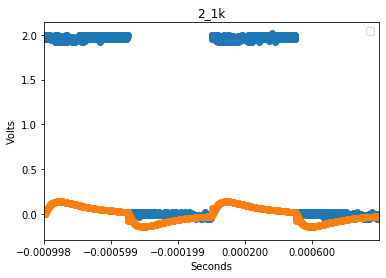

In [12]:
plot_osc("/home/nick/sshfs/Documents/lab07/scope_10.csv",
"2_1k")

No handles with labels found to put in legend.


[[-9.98000000e-04  1.99487432e+00  1.89356800e-02]
 [-9.97000000e-04  1.95467332e+00  1.08954800e-02]
 [-9.96000000e-04  1.99487432e+00  1.08954800e-02]
 ...
 [ 9.97000000e-04 -4.53266600e-02 -1.16482000e-03]
 [ 9.98000000e-04 -1.51759100e-02 -1.16482000e-03]
 [ 9.99000000e-04 -1.51759100e-02  1.85025000e-03]]
(1998, 3)
[ 1.99487432  1.95467332  1.99487432 ... -0.04532666 -0.01517591
 -0.01517591]


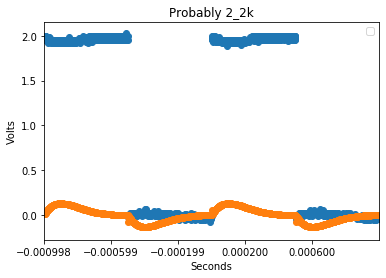

In [13]:
plot_osc("/home/nick/sshfs/Documents/lab07/scope_11.csv",
"Probably 2_2k")

No handles with labels found to put in legend.


[[-9.98000000e-04  1.95457285e+00  1.08954800e-02]
 [-9.97000000e-04  1.96462311e+00  1.08954800e-02]
 [-9.96000000e-04  1.97467336e+00  1.08954800e-02]
 ...
 [ 9.97000000e-04 -3.53768700e-02  9.89045000e-03]
 [ 9.98000000e-04 -5.54773800e-02  1.08954800e-02]
 [ 9.99000000e-04 -3.53768700e-02  1.08954800e-02]]
(1998, 3)
[ 1.95457285  1.96462311  1.97467336 ... -0.03537687 -0.05547738
 -0.03537687]


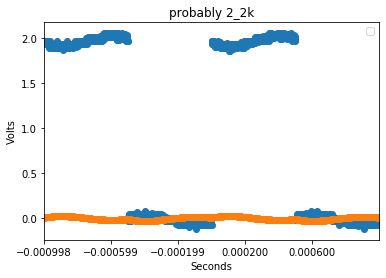

In [14]:
plot_osc("/home/nick/sshfs/Documents/lab07/scope_14.csv",
"probably 2_2k")